In [10]:
#Get the data, read the modified csv version
import pandas as pd
import numpy as np
dataset = pd.read_csv(r'../csv/modified_female_shirts.csv')
dataset.head(3)

,height(cm),weight(kg),size
0,154.94,64.410117,S
1,162.56,54.431084,M
2,172.72,66.678078,M


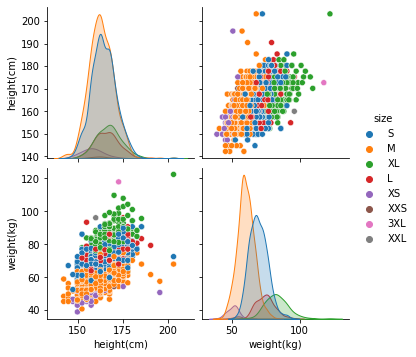

In [11]:
import seaborn as sns
%matplotlib inline

sns.pairplot(dataset, hue='size')

In [12]:
from sklearn.model_selection import train_test_split
X = dataset.drop('size', axis=1)
y = dataset['size']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [15]:
from sklearn.tree import DecisionTreeClassifier
decision_classifier = DecisionTreeClassifier()
decision_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
decision_prediction = decision_classifier.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, decision_prediction))
print(classification_report(y_test, decision_prediction))

[[  0   0   0   0   1   0   0   0]
 [  0  13   9  18  11   0   0   0]
 [  0   3 206  60   0  11   0   3]
 [  0  30  87 111   7   0   0   0]
 [  0  18   3  16  25   0   4   0]
 [  0   0  13   0   0   5   0   2]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

         3XL       0.00      0.00      0.00         1
           L       0.20      0.25      0.23        51
           M       0.65      0.73      0.69       283
           S       0.54      0.47      0.50       235
          XL       0.57      0.38      0.45        66
          XS       0.31      0.25      0.28        20
         XXL       0.00      0.00      0.00         0
         XXS       0.00      0.00      0.00         0

    accuracy                           0.55       656
   macro avg       0.28      0.26      0.27       656
weighted avg       0.56      0.55      0.55       656



c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [18]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=200)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [22]:
random_forest_predictions = random_forest_classifier.predict(X_test)

In [24]:
print(confusion_matrix(y_test, random_forest_predictions))
print(classification_report(y_test, random_forest_predictions))

[[  0   0   0   0   1   0   0]
 [  0   4   6  29  12   0   0]
 [  0   2 191  76   2   9   3]
 [  0  16  62 142  15   0   0]
 [  0   6   3  23  34   0   0]
 [  0   0  14   0   0   4   2]
 [  0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

         3XL       0.00      0.00      0.00         1
           L       0.14      0.08      0.10        51
           M       0.69      0.67      0.68       283
           S       0.53      0.60      0.56       235
          XL       0.53      0.52      0.52        66
          XS       0.31      0.20      0.24        20
         XXS       0.00      0.00      0.00         0

    accuracy                           0.57       656
   macro avg       0.31      0.30      0.30       656
weighted avg       0.56      0.57      0.56       656



c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 